In [1]:
import os
import csv
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

In [3]:

log_dir = 'BipedalWalker-v3socialwith_lagrangeTrue up_iter1cql_w3.0lr0.0005TAU0.05target_a_g1.5temp1.02024-06-27 01-18-37'
output_csv = 'online.csv'

def event_files(log_dir):
    for root, _, files in os.walk(log_dir):
        for file in files:
            if file.startswith('events.out.tfevents'):
                yield os.path.join(root, file)

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['wall_time', 'step', 'tag', 'value'])

    for event_file in event_files(log_dir):
        event_acc = EventAccumulator(event_file)
        event_acc.Reload()

        tags = event_acc.Tags()['scalars']
        for tag in tags:
            for scalar_event in event_acc.Scalars(tag):
                writer.writerow([scalar_event.wall_time, scalar_event.step, tag, scalar_event.value])


In [7]:
data = pd.read_csv('semibestexpert.csv')

## online

In [4]:
rewardonline = data[data['tag'] == 'Reward']['value'].to_numpy()
evalonline = data[data['tag'] == 'Eval Score']['value'].to_numpy()
selectiononline= data[data['tag'] == 'Agent Selection']['value'].to_numpy()
Scorenonline= data[data['tag'] == 'Agent Score']['value'].to_numpy()
n_episode = data[data['tag'] == 'Reward']['step'].to_numpy()

In [5]:
selectiononline = selectiononline.reshape(4, -1)
Scorenonline = Scorenonline.reshape(4, -1)

C:\Users\nimaz\AppData\Local\Temp\ipykernel_17108\2589351353.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


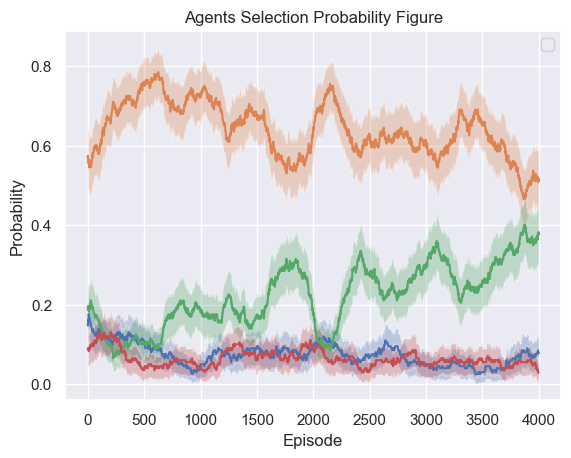

In [20]:


# Convert the array to a DataFrame
df = pd.DataFrame(selectiononline.T, columns=['Flat Expert', 'Hardcore Expert', 'Us', 'Random'])
# color_smooth = ['g', 'b', 'r', 'blueviolet']
# color_noise = ['g', 'b', 'r', 'blueviolet']
window_size = 200
df_smooth = df[:4000].rolling(window=window_size, min_periods=1, center=True).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df[:4000].rolling(window=window_size, min_periods=1, center=True).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 0.15 * df_std
ci_upper = df_smooth + 0.15 * df_std

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for student in df.columns:
    sns.lineplot(data=df_smooth[student])#, label=student)
    plt.fill_between(df_smooth.index, ci_lower[student], ci_upper[student], alpha=0.3)

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.title('Agents َSelection Probability Figure')
# plt.legend(title='Agents', bbox_to_anchor=(0.8, 0.5), loc='upper left')
plt.legend()

# Show plot
plt.show()

C:\Users\nimaz\AppData\Local\Temp\ipykernel_17108\2381410767.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


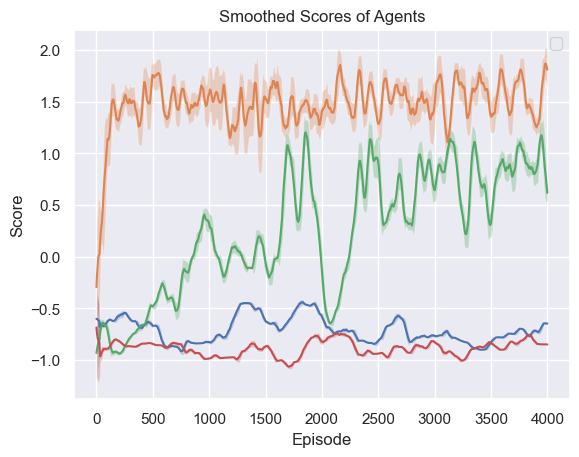

In [21]:
# Convert the array to a DataFrame
df = pd.DataFrame(Scorenonline.T, columns=['Flat Expert', 'Hardcore Expert', 'Our Agent', 'Random Agent'])

# Apply a rolling average to smooth the data
window_size = 50
df_smooth = df[:4000].rolling(window=window_size, min_periods=1,center=True).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df[:4000].rolling(window=window_size, min_periods=1,center=True).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 1 * df_std
ci_upper = df_smooth + 1 * df_std

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for student in df.columns:
    sns.lineplot(data=df_smooth[student])
    plt.fill_between(df_smooth.index, ci_lower[student], ci_upper[student], alpha=0.3)

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Smoothed Scores of Agents')
plt.legend()

# Show plot
plt.show()

C:\Users\nimaz\AppData\Local\Temp\ipykernel_3536\1951950517.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


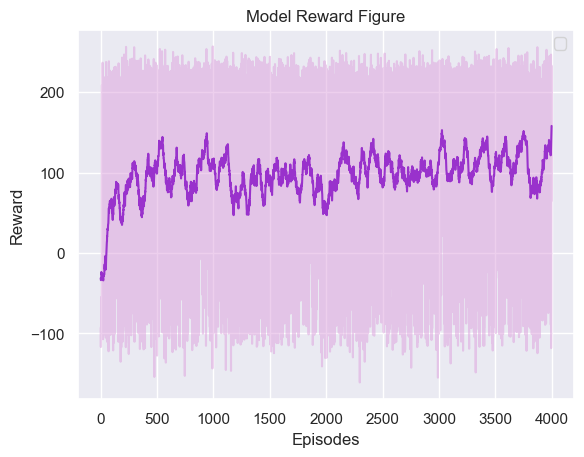

In [6]:
# Smooth the data using a rolling average
window_size = 50
y_smooth = pd.Series(rewardonline[:4000]).rolling(window=window_size, min_periods=1, center=True).mean()

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode[:4000], rewardonline[:4000], color='plum', alpha=0.5)#, label='Reward')

# Plot smoothed data
plt.plot(n_episode[:4000], y_smooth, color='darkorchid')#, label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Model Reward Figure')
plt.legend()

# Show plot
plt.show()


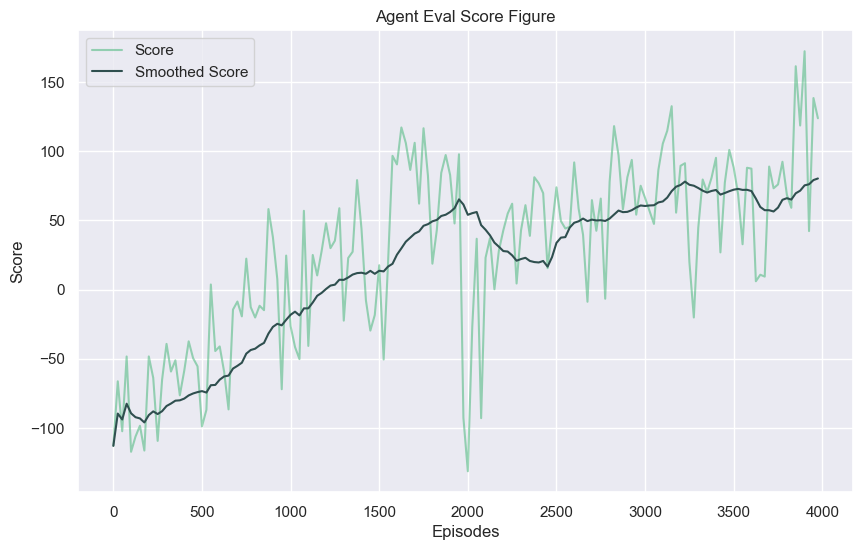

In [54]:
# Smooth the data using a rolling average
window_size = 20
y_smooth = pd.Series(evalonline[:160]).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode[:4000][::25], evalonline[:160], color='mediumseagreen', alpha=0.5, label='Score')

# Plot smoothed data
plt.plot(n_episode[:4000][::25], y_smooth, color='darkslategray', label='Smoothed Score')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Agent Eval Score Figure')
plt.legend()

# Show plot
plt.show()


## no expert

In [122]:
rewardnoexpert = data[data['tag'] == 'Reward']['value'].to_numpy()
evalnoexpert = data[data['tag'] == 'Eval Score']['value'].to_numpy()
selectionnoexpert= data[data['tag'] == 'Agent Selection']['value'].to_numpy()
Scorenoexpert= data[data['tag'] == 'Agent Score']['value'].to_numpy()
n_episode = data[data['tag'] == 'Reward']['step'].to_numpy()

In [123]:
selectionnoexpert = selectionnoexpert.reshape(3, -1)
Scorenoexpert = Scorenoexpert.reshape(3, -1)

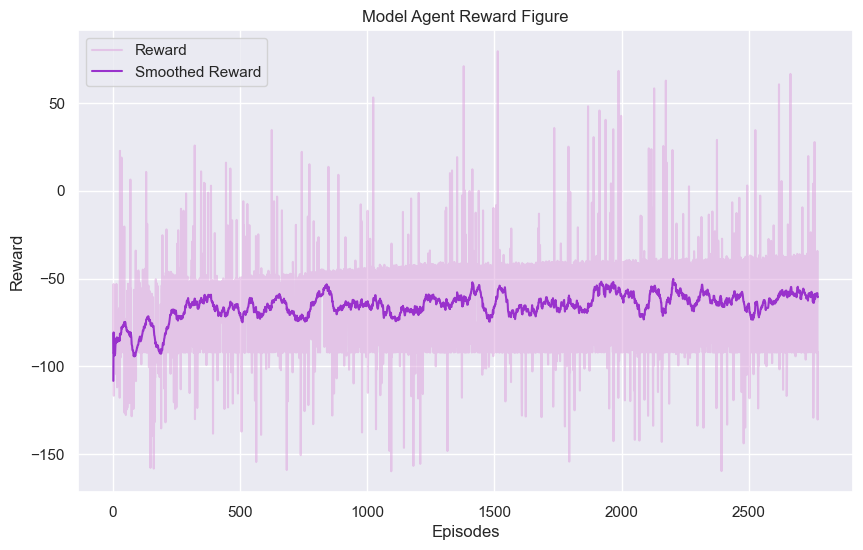

In [71]:
# Smooth the data using a rolling average
window_size = 40
y_smooth = pd.Series(rewardnoexpert).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode, rewardnoexpert, color='plum', alpha=0.5, label='Reward')

# Plot smoothed data
plt.plot(n_episode, y_smooth, color='darkorchid', label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Model Agent Reward Figure')
plt.legend()

# Show plot
plt.show()

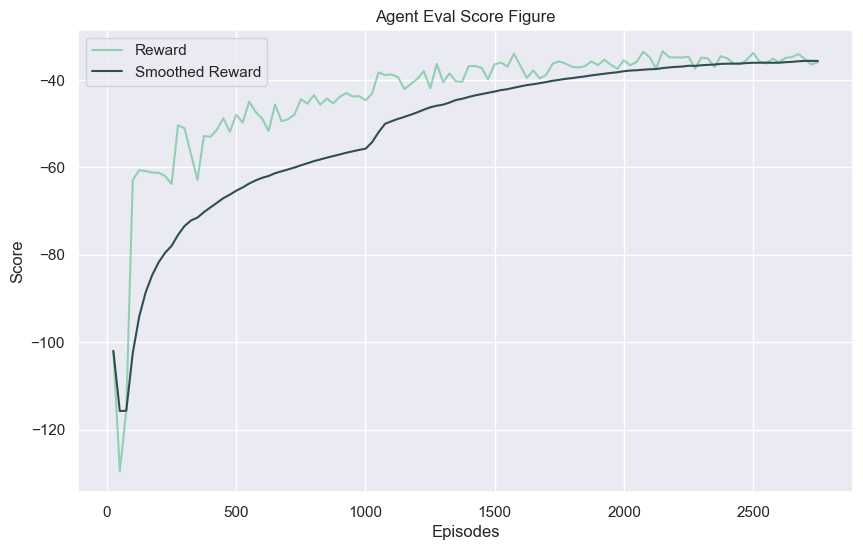

In [124]:
# Smooth the data using a rolling average
window_size = 40
y_smooth = pd.Series(evalnoexpert).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode[25::25], evalnoexpert, color='mediumseagreen', alpha=0.5, label='Reward')

# Plot smoothed data
plt.plot(n_episode[25::25], y_smooth, color='darkslategray', label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Agent Eval Score Figure')
plt.legend()

# Show plot
plt.show()

In [108]:
selectionnoexpert.shape

(3, 2774)

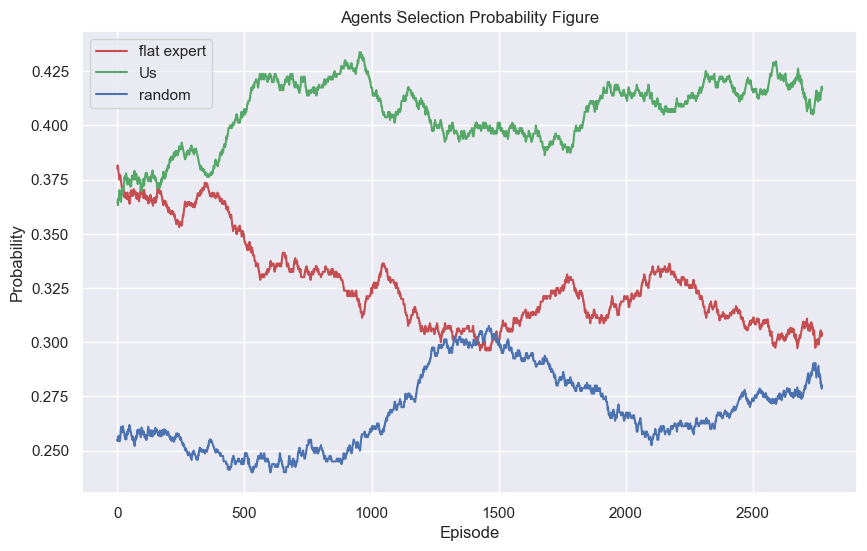

In [114]:
# Convert the array to a DataFrame
df = pd.DataFrame(selectionnoexpert.T, columns=[ 'ّflat expert','Us','random'])#, 'Us', 'Random'])
color_smooth = ['r', 'g', 'b', 'blueviolet']
color_noise = ['r', 'g', 'b', 'blueviolet']
window_size = 800
df_smooth = df.rolling(window=window_size, min_periods=1, center=True).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot original and smoothed scores
for i_plot, student in enumerate(df.columns):
    # sns.lineplot(data=df[student], color=color_noise[i_plot], alpha=0.4)
    sns.lineplot(data=df_smooth[student],color = color_smooth[i_plot],  label=student)

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.title('Agents َSelection Probability Figure')
# plt.legend(title='Agents', bbox_to_anchor=(0.8, 0.5), loc='upper left')
plt.legend()

# Show plot
plt.show()

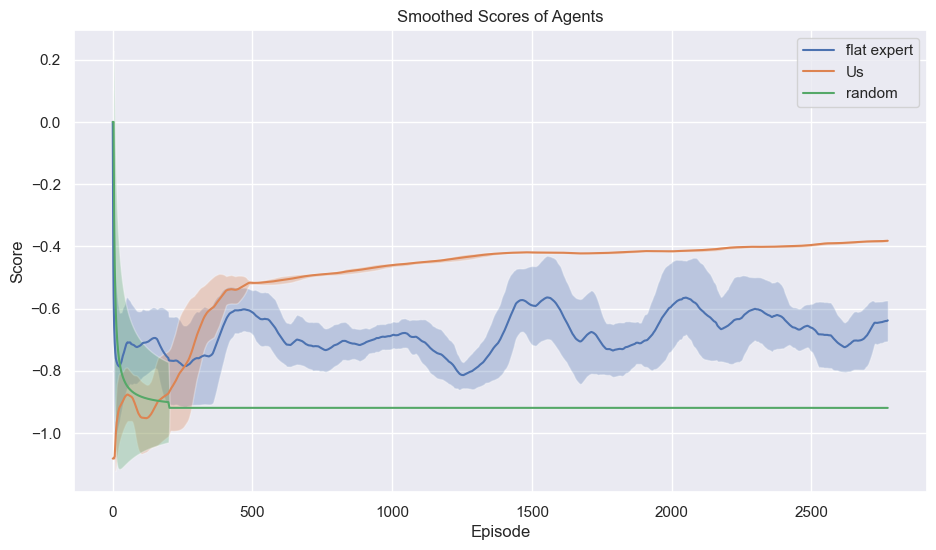

In [113]:
color_smooth = ['r', 'g', 'r', 'blueviolet']
color_noise = ['r', 'g', 'r', 'blueviolet']

# Convert the array to a DataFrame
df = pd.DataFrame(Scorenoexpert.T, columns=[ 'ّflat expert','Us','random'])#, 'Us', 'Random'])

# Apply a rolling average to smooth the data
window_size = 200
df_smooth = df.rolling(window=window_size, min_periods=1).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df.rolling(window=window_size, min_periods=1).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 1 * df_std
ci_upper = df_smooth + 1 * df_std

# Create the plot
plt.figure(figsize=(11, 6))
sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for student in df.columns:
    sns.lineplot(data=df_smooth[student], label=student)
    plt.fill_between(df_smooth.index, ci_lower[student], ci_upper[student], alpha=0.3)

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Smoothed Scores of Agents')
plt.legend()

# Show plot
plt.show()

## semibest

In [8]:
rewardsemibest = data[data['tag'] == 'Reward']['value'][:4000].to_numpy()
evalsemibest = data[data['tag'] == 'Eval Score']['value'][:160].to_numpy()
selectionsemibest= data[data['tag'] == 'Agent Selection']['value'].to_numpy()
Scorensemibest= data[data['tag'] == 'Agent Score']['value'].to_numpy()
n_episode = data[data['tag'] == 'Reward']['step'][:4000].to_numpy()

In [9]:
selectionsemibest = selectionsemibest.reshape(2, -1)
Scorensemibest = Scorensemibest.reshape(2, -1)

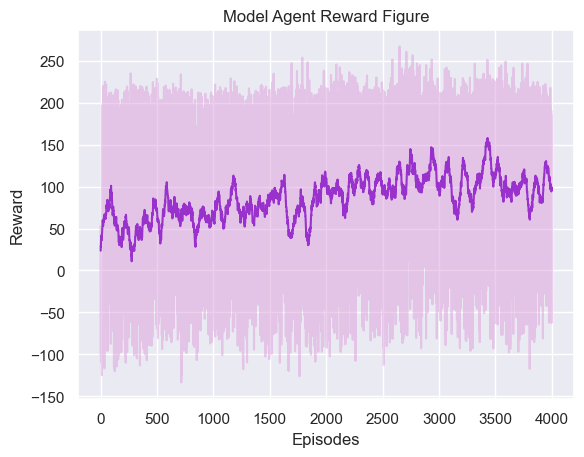

In [12]:
# Smooth the data using a rolling average
window_size = 50
y_smooth = pd.Series(rewardsemibest).rolling(window=window_size, min_periods=1, center=True).mean()

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode, rewardsemibest, color='plum', alpha=0.5)

# Plot smoothed data
plt.plot(n_episode, y_smooth, color='darkorchid')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Model Agent Reward Figure')
# plt.legend()

# Show plot
plt.show()

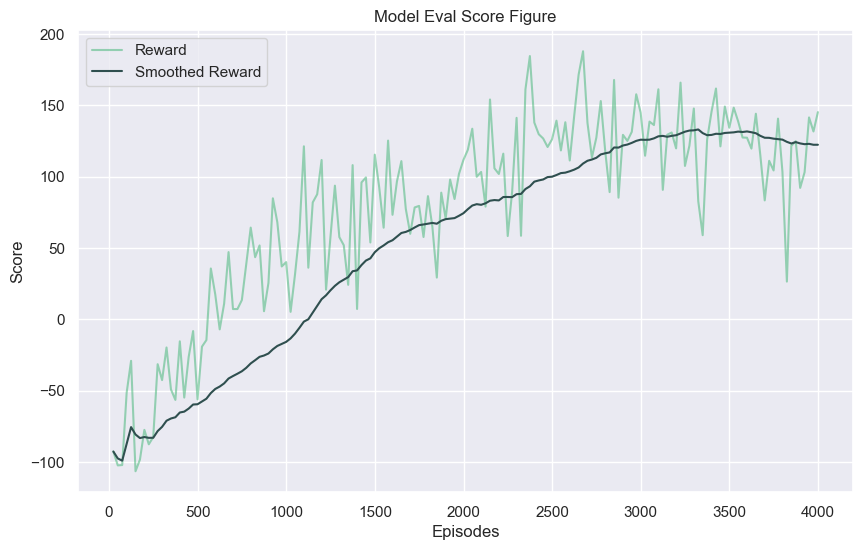

In [83]:
# Smooth the data using a rolling average
window_size = 40
y_smooth = pd.Series(evalsemibest).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode[24::25], evalsemibest, color='mediumseagreen', alpha=0.5, label='Reward')

# Plot smoothed data
plt.plot(n_episode[24::25], y_smooth, color='darkslategray', label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Model Eval Score Figure')
plt.legend()

# Show plot
plt.show()

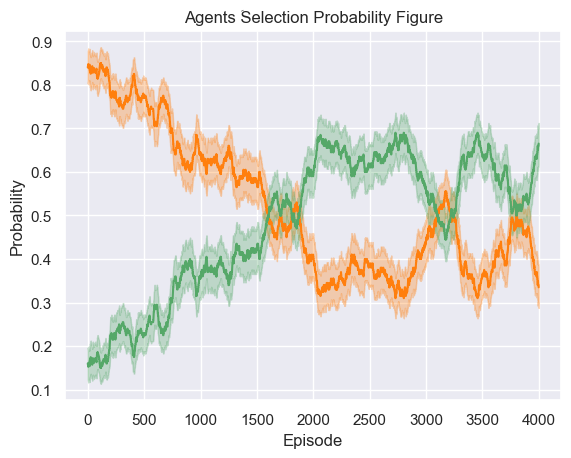

In [35]:
# Convert the array to a DataFrame
df = pd.DataFrame(selectionsemibest.T, columns=[ 'Hardcore Semi Expert','Us'])#, 'Us', 'Random'])
color_smooth = ['tab:orange', 'g', 'r', 'blueviolet']
color_noise = ['tab:orange', 'g', 'r', 'blueviolet']
# Apply a rolling average to smooth the data
window_size = 200
df_smooth = df.rolling(window=window_size, min_periods=1, center=True).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df.rolling(window=window_size, min_periods=1, center=True).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 0.1 * df_std
ci_upper = df_smooth + 0.1 * df_std

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for i_plot, student in enumerate(df.columns):
    sns.lineplot(data=df_smooth[student][:4000], color = color_smooth[i_plot])
    plt.fill_between(df_smooth.index[:4000], ci_lower[student][:4000], ci_upper[student][:4000], alpha=0.3, color = color_noise[i_plot])
    
    
# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.title('Agents َSelection Probability Figure')
# plt.legend(title='Agents', bbox_to_anchor=(0.8, 0.5), loc='upper left')
# plt.legend()

# Show plot
plt.show()

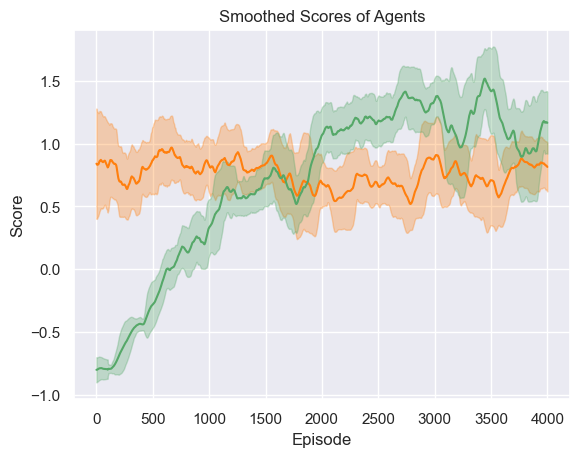

In [33]:
color_smooth = ['tab:orange', 'g', 'r', 'blueviolet']
color_noise = ['tab:orange', 'g', 'r', 'blueviolet']

# Convert the array to a DataFrame
df = pd.DataFrame(Scorensemibest.T, columns=[ 'Hardcore Semi Expert','Us'])#, 'Us', 'Random'])

# Apply a rolling average to smooth the data
window_size = 200
df_smooth = df.rolling(window=window_size, min_periods=1,center = True).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df.rolling(window=window_size, min_periods=1,center=True).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 1 * df_std
ci_upper = df_smooth + 1 * df_std

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for i_plot, student in enumerate(df.columns):
    sns.lineplot(data=df_smooth[student][:4000], color = color_smooth[i_plot])
    plt.fill_between(df_smooth.index[:4000], ci_lower[student][:4000], ci_upper[student][:4000], alpha=0.3, color = color_noise[i_plot])

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Smoothed Scores of Agents')
# plt.legend()

# Show plot
plt.show()

## best expert

In [26]:
rewardbest = data[data['tag'] == 'Reward']['value'].to_numpy()
evalbest = data[data['tag'] == 'Eval Score']['value'].to_numpy()
selectionbest= data[data['tag'] == 'Agent Selection']['value'].to_numpy()
Scorenbest= data[data['tag'] == 'Agent Score']['value'].to_numpy()
n_episode = data[data['tag'] == 'Reward']['step'].to_numpy()

In [28]:
selectionbest = selectionbest.reshape(4, -1)
Scorenbest = Scorenbest.reshape(4, -1)

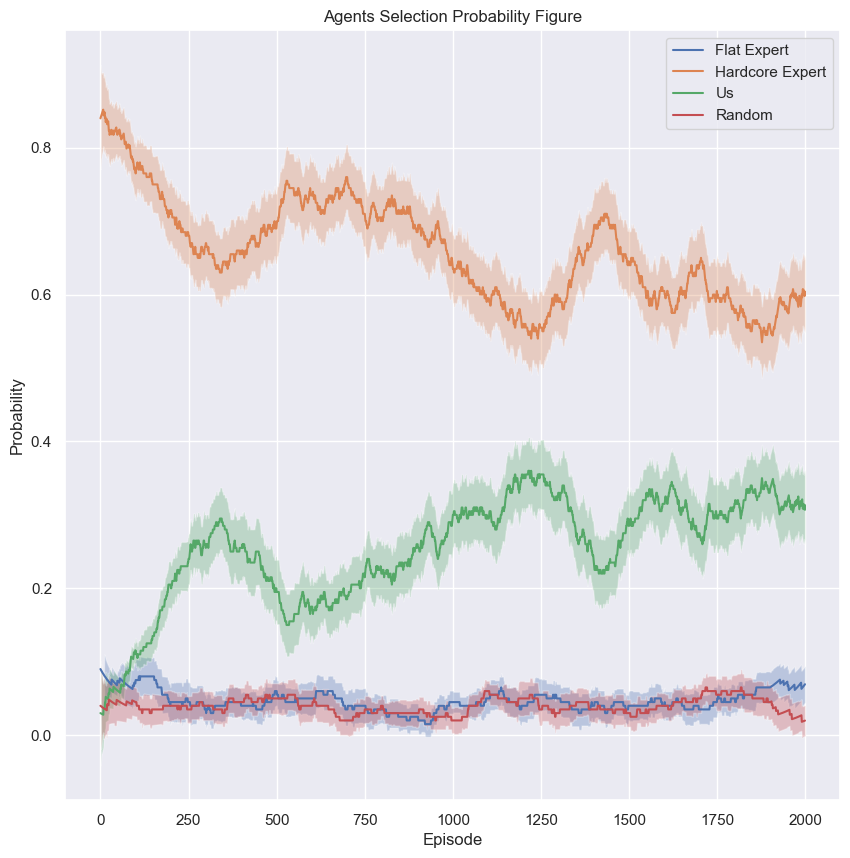

In [51]:


# Convert the array to a DataFrame
df = pd.DataFrame(selectionbest.T, columns=['Flat Expert', 'Hardcore Expert', 'Us', 'Random'])
# color_smooth = ['g', 'b', 'r', 'blueviolet']
# color_noise = ['g', 'b', 'r', 'blueviolet']
window_size = 200
df_smooth = df.rolling(window=window_size, min_periods=1, center=True).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df.rolling(window=window_size, min_periods=1).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 0.1 * df_std
ci_upper = df_smooth + 0.1 * df_std

# Create the plot
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for student in df.columns:
    sns.lineplot(data=df_smooth[student], label=student)
    plt.fill_between(df_smooth.index, ci_lower[student], ci_upper[student], alpha=0.3)

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Probability')
plt.title('Agents Selection Probability Figure')
plt.legend(title='Agents', bbox_to_anchor=(1.8, 1.5), loc='upper left')
plt.legend()

# Show plot
plt.show()

C:\Users\nimaz\AppData\Local\Temp\ipykernel_9108\1117362039.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


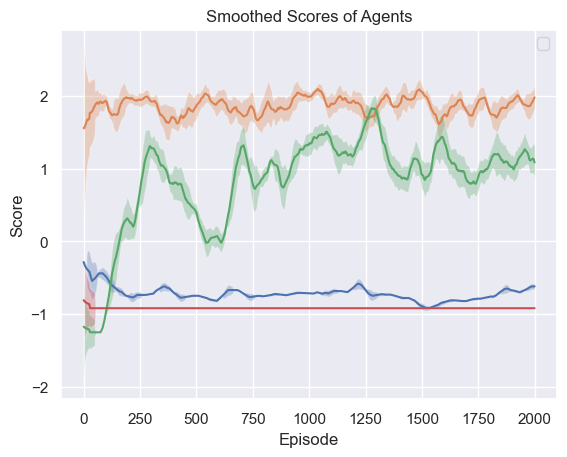

In [46]:


# Convert the array to a DataFrame
df = pd.DataFrame(Scorenbest.T, columns=['Flat Expert', 'Hardcore Expert', 'Our Agent', 'Random Agent'])

# Apply a rolling average to smooth the data
window_size = 50
df_smooth = df.rolling(window=window_size, min_periods=1, center=True).mean()

# Calculate rolling standard deviation for confidence interval
df_std = df.rolling(window=window_size, min_periods=1).std()

# Calculate the confidence interval (95%)
ci_lower = df_smooth - 1 * df_std
ci_upper = df_smooth + 1 * df_std

# Create the plot
plt.figure()
# sns.set(style="darkgrid")

# Plot smoothed scores with confidence intervals
for student in df.columns:
    sns.lineplot(data=df_smooth[student])#, label=student)
    plt.fill_between(df_smooth.index, ci_lower[student], ci_upper[student], alpha=0.3)

# Add labels and legend
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Smoothed Scores of Agents')
plt.legend()
# Show plot
plt.show()

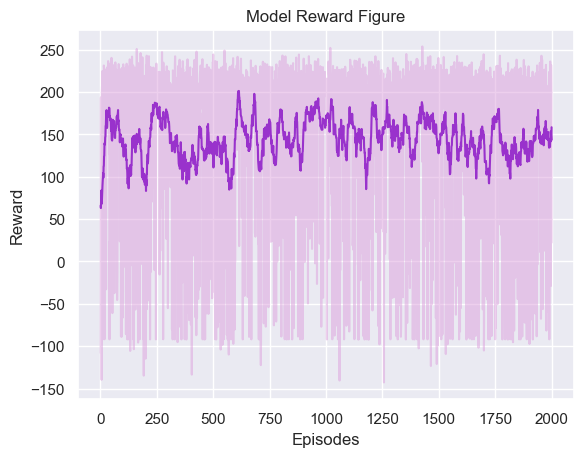

In [29]:
# Smooth the data using a rolling average
window_size = 25
y_smooth = pd.Series(rewardbest).rolling(window=window_size, min_periods=1, center=True).mean()

# Create the plot
plt.figure()
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode, rewardbest, color='plum', alpha=0.5)#, label='Reward')

# Plot smoothed data
plt.plot(n_episode, y_smooth, color='darkorchid')#, label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Model Reward Figure')
# plt.legend()

# Show plot
plt.show()


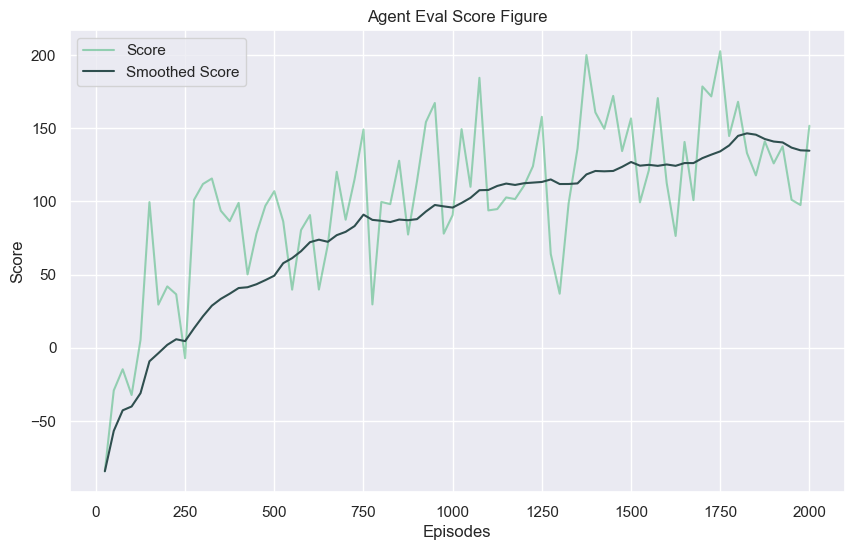

In [88]:
# Smooth the data using a rolling average
window_size = 20
y_smooth = pd.Series(evalbest).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(n_episode[24::25], evalbest, color='mediumseagreen', alpha=0.5, label='Score')

# Plot smoothed data
plt.plot(n_episode[24::25], y_smooth, color='darkslategray', label='Smoothed Score')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Agent Eval Score Figure')
plt.legend()

# Show plot
plt.show()


## single 10k1

In [13]:
reward10k1 = data[data['tag'] == 'Reward']['value'].to_numpy()
alpha10k1 = data[data['tag'] == 'alpha']['value'].to_numpy()
eval10k1 = data[data['tag'] == 'Eval Score']['value'].to_numpy()
Episode10k1 = data[data['tag'] == 'alpha']['step'].to_numpy()

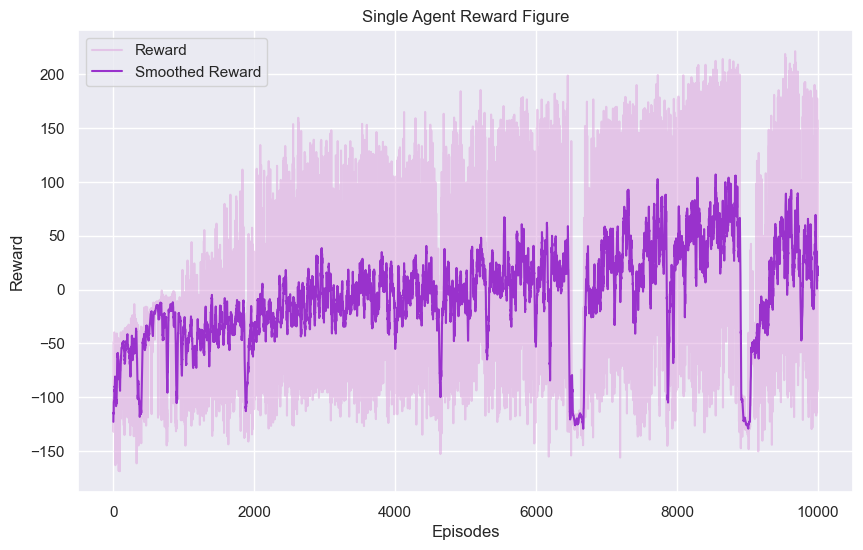

In [ ]:
# Smooth the data using a rolling average
window_size = 20
y_smooth = pd.Series(reward10k).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(Episode10k, reward10k, color='plum', alpha=0.5, label='Reward')

# Plot smoothed data
plt.plot(Episode10k, y_smooth, color='darkorchid', label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Single Agent Reward Figure')
plt.legend()

# Show plot
plt.show()


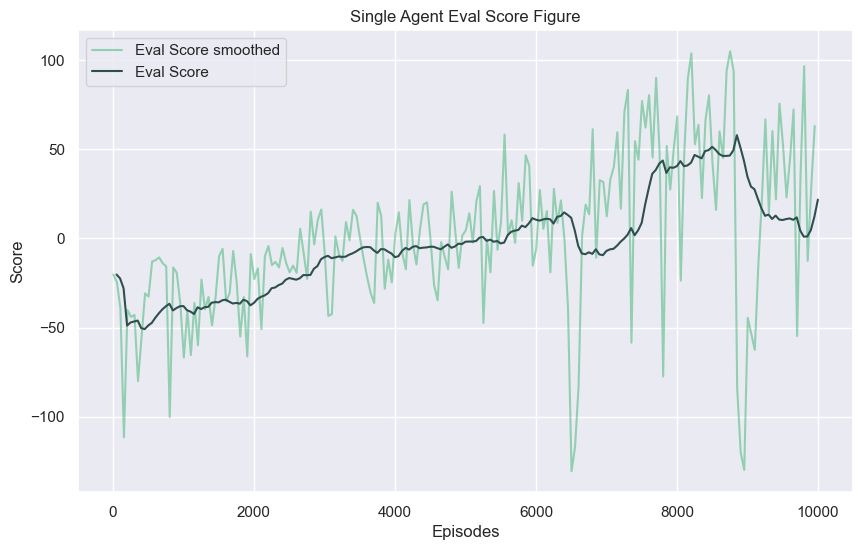

In [ ]:
# Generate noisy data
reward10k

# Smooth the data using a rolling average
window_size = 20
eval_smooth = pd.Series(eval10k).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(Episode10k[4::50], eval10k, color='mediumseagreen', alpha=0.5, label='Eval Score smoothed')
plt.plot(Episode10k[49::50], eval_smooth, color='darkslategray', label='Eval Score')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Single Agent Eval Score Figure')
plt.legend()

# Show plot
plt.show()


In [90]:
reward10k = data[data['tag'] == 'Reward']['value'].to_numpy()
alpha10k = data[data['tag'] == 'alpha']['value'].to_numpy()
eval10k = data[data['tag'] == 'Eval Score']['value'].to_numpy()
Episode10k = data[data['tag'] == 'alpha']['step'].to_numpy()

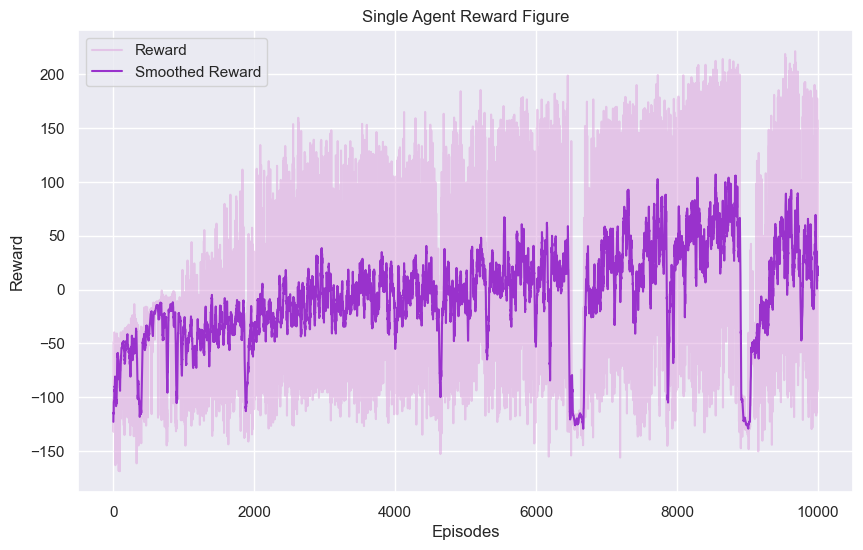

In [71]:
# Smooth the data using a rolling average
window_size = 20
y_smooth = pd.Series(reward10k).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(Episode10k, reward10k, color='plum', alpha=0.5, label='Reward')

# Plot smoothed data
plt.plot(Episode10k, y_smooth, color='darkorchid', label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Single Agent Reward Figure')
plt.legend()

# Show plot
plt.show()


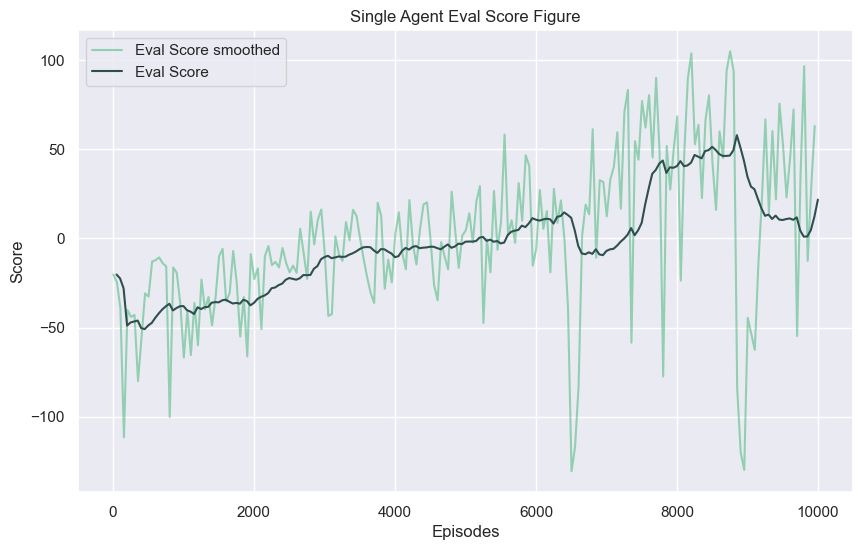

In [94]:
# Generate noisy data
reward10k

# Smooth the data using a rolling average
window_size = 20
eval_smooth = pd.Series(eval10k).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(Episode10k[4::50], eval10k, color='mediumseagreen', alpha=0.5, label='Eval Score smoothed')
plt.plot(Episode10k[49::50], eval_smooth, color='darkslategray', label='Eval Score')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Single Agent Eval Score Figure')
plt.legend()

# Show plot
plt.show()


## single 10k2

In [5]:
reward10k2 = data[data['tag'] == 'Reward']['value'].to_numpy()
alpha10k2 = data[data['tag'] == 'alpha']['value'].to_numpy()
eval10k2 = data[data['tag'] == 'Eval Score']['value'].to_numpy()
Episode10k2 = data[data['tag'] == 'alpha']['step'].to_numpy()

In [16]:
reward10k1

array([-122.89293671, -117.90290833, -102.29216003, ...,   29.04908752,
        133.46975708,  134.87098694])

In [17]:
reward10k = (reward10k1+reward10k)/2
alpha10k = (alpha10k1+alpha10k)/2
eval10k = (eval10k1+eval10k)/2
Episode10k = (Episode10k1+Episode10k)/2

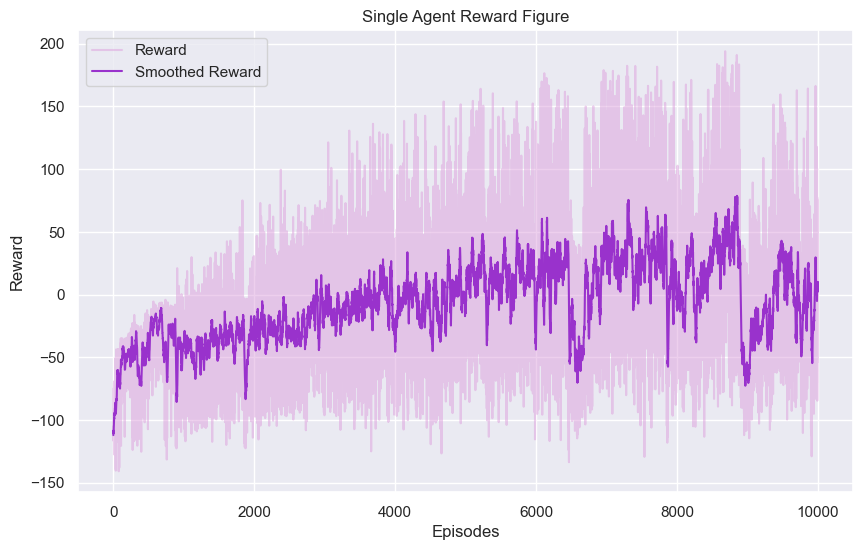

In [18]:
# Smooth the data using a rolling average
window_size = 20
y_smooth = pd.Series(reward10k).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(Episode10k, reward10k, color='plum', alpha=0.5, label='Reward')

# Plot smoothed data
plt.plot(Episode10k, y_smooth, color='darkorchid', label='Smoothed Reward')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Single Agent Reward Figure')
plt.legend()

# Show plot
plt.show()


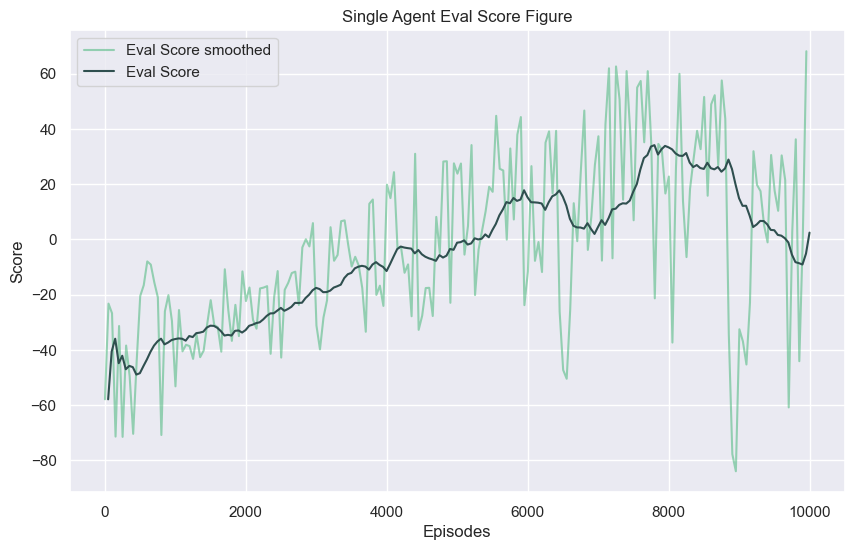

In [19]:
# Generate noisy data
reward10k

# Smooth the data using a rolling average
window_size = 20
eval_smooth = pd.Series(eval10k).rolling(window=window_size, min_periods=1).mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Plot noisy data in lighter color
plt.plot(Episode10k[4::50], eval10k, color='mediumseagreen', alpha=0.5, label='Eval Score smoothed')
plt.plot(Episode10k[49::50], eval_smooth, color='darkslategray', label='Eval Score')

# Add labels and legend
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title('Single Agent Eval Score Figure')
plt.legend()

# Show plot
plt.show()
